In [1]:
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn import datasets, metrics, model_selection, svm
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import StackingClassifier

from sklearn.tree import DecisionTreeClassifier

# Holdout
from sklearn.model_selection import train_test_split

# Feature permutation
from sklearn.inspection import permutation_importance

# Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import set_config; set_config(display='diagram') # Pour visualiser 

# PCA
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from mlxtend.plotting import plot_pca_correlation_graph

# GridSearch
from sklearn.model_selection import GridSearchCV

# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

# Pickle
import pickle

# Par fit 
import parfit.parfit as pf

0.8729227761485826
0.7605633802816901
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1975
           1       0.18      0.76      0.29        71

    accuracy                           0.87      2046
   macro avg       0.59      0.82      0.61      2046
weighted avg       0.96      0.87      0.91      2046



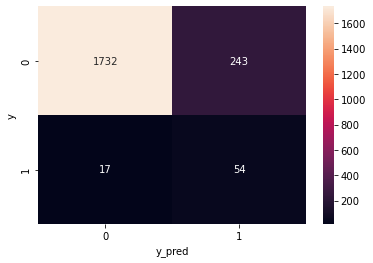

In [3]:
df_raw = pd.read_csv('data/data.csv')
df_raw = df_raw.rename(columns=lambda x: x.strip()) #enlever espace blanc
df_raw = df_raw.rename(columns={"Net Income to Stockholder's Equity": 'Net Income to Stockholders Equity'})
df_raw = df_raw.drop_duplicates() # Duplicates
pd.options.display.max_columns = None

df = df_raw

# Aucunes missing Values (Drop / SimpleImputer) et duplicates

# Moyenne de certaines colonnes après avoir vu les corrélations dans le dataset
df['ROA'] = (df[['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
                 'ROA(B) before interest and depreciation after tax']].sum(axis=1))/3

df['Margin'] = (df[['Operating Gross Margin', 'Realized Sales Gross Margin',
                 'Gross Profit to Sales']].sum(axis=1))/3

df['Net Value Per Share'] = (df[['Net Value Per Share (B)', 'Net Value Per Share (A)',
                 'Net Value Per Share (C)']].sum(axis=1))/3

#drop de colonnes avec une forte corrélation + 'Net Income Flag' qui est inutile
df = df.drop(['Current Liability to Liability', 'Liability to Equity', 'Current Liability to Equity', 
             'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax',
             'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin',
             'Gross Profit to Sales', 'Net Value Per Share (B)' , 'Net Value Per Share (A)',
             'Net Value Per Share (C)','Net Income Flag', 'Long-term Liability to Current Assets', 'Quick Asset Turnover Rate'], axis=1)


LR_model = LogisticRegression()


# preprocessor = ColumnTransformer(('scaling', StandardScaler()))

LR_pipe = Pipeline([
    ('scaling', MinMaxScaler()),
    ('balancing', SMOTE(random_state=1)),
    ('LR', LR_model)])

X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)


LR_pipe_trained = LR_pipe.fit(X_train,y_train)

y_pred = LR_pipe_trained.predict(X_test)
    

print(LR_pipe_trained.score(X_test,y_test))
print(recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred)

In [ ]:
# Export pipeline as pickle file
with open("model.pkl", "wb") as file:
    pickle.dump(LR_pipe_trained, file)